In [2]:
!pip install pandas

     ---------------------------------------- 10.6/10.6 MB 7.7 MB/s eta 0:00:00
     ------------------------------------- 502.3/502.3 kB 10.5 MB/s eta 0:00:00
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
     ---------------------------------------- 15.0/15.0 MB 9.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install numpy


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install scikit-learn

     ---------------------------------------- 8.3/8.3 MB 8.0 MB/s eta 0:00:00
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0

!python -m pip install "tensorflow"
# Verify install:
!python -c "import tensorflow as tf"

"conda" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


  Using cached tensorflow-2.12.0-cp311-cp311-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl (272.9 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.8.0-cp311-cp311-win_amd64.whl (2.6 MB)
  Using cached jax-0.4.12-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.54.2-cp311-cp311-win_amd64.whl (4.1 MB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl (938 kB)
  Using cached google_auth-2.20.0-py2.py3-none-any.whl (181 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.4.3-py3-none-any.whl (93 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached cachetools-5.3.1-


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install keras

  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 9.0 MB/s eta 0:00:00
     ------------------------------------- 470.9/470.9 kB 14.9 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 1.9/1.9 MB 10.3 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB ? eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 102.6/102.6 kB ? eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Используя тип нейронной сети RNN LSTM сделайте прогноз развития уровня углекислого газа, используя следующие данные  .Поле“interpolated” содержит тренд развития уровня CO2, поля “year” и “month” содержат годи месяц соответственно


RMSE означает Root Mean Square Error (квадратный корень из среднего квадратичного отклонения). Это популярная метрика для оценки качества моделей машинного обучения, особенно в задачах регрессии.

RMSE измеряет стандартное отклонение разности между предсказанными и реальными значениями. Другими словами, он показывает, насколько предсказание модели отклоняется от фактического значения.

Меньшее значение RMSE указывает на меньшую разницу между предсказанными и реальными значениями, что является индикатором более высокого качества модели. Однако, RMSE не идеальна и может быть чувствительна к выбросам. Это означает, что даже одно или несколько очень плохих предсказаний могут значительно увеличить ваше значение RMSE.

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import math


# преобразование данных в последовательности
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [10]:
data = pd.read_csv('co2_mm_mlo.csv', sep=';')
data.head(10)


,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,-99.99,317.10
4,1958,7,1958.542,315.86,315.86
5,1958,8,1958.625,314.93,314.93
6,1958,9,1958.708,313.20,313.20
7,1958,10,1958.792,-99.99,312.66
8,1958,11,1958.875,313.33,313.33
9,1958,12,1958.958,314.67,314.67


In [11]:
# Нормализуем данные
scaler = MinMaxScaler(feature_range=(0, 1))
data['normalized'] = scaler.fit_transform(data['interpolated'].values.reshape(-1,1))

In [22]:
# Деление данных на тренировочную и тестовую выборки
train_data = data[data['year'] < 2010]
test_data = data[data['year'] >= 2010]

# Преобразование данных в последовательности
look_back = 3
trainX, trainY = create_dataset(train_data['normalized'].values, look_back)
testX, testY = create_dataset(test_data['normalized'].values, look_back)

# Форма данных для подачи в LSTM
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=30, batch_size=32)

Epoch 1/30
20/20 [==============================] - 1s 1ms/step - loss: 0.1083
Epoch 2/30
20/20 [==============================] - 0s 1ms/step - loss: 0.0413
Epoch 3/30
20/20 [==============================] - 0s 1ms/step - loss: 0.0130
Epoch 4/30
20/20 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 5/30
20/20 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 6/30
20/20 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 7/30
20/20 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 8/30
20/20 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 9/30
20/20 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 10/30
20/20 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 11/30
20/20 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 12/30
20/20 [==============================] - 0s 1ms/step - loss: 8.5827e-04
Epoch 13/30
20/20 [==========================

RMSE (квадратный корень из среднего квадратичного отклонения) - измеряет стандартное отклонение разности между предсказанными и реальными значениями.

RMSE показывает, насколько предсказание модели отклоняется от фактического значения.

In [23]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Преобразование предсказанных значений к исходному масштабу
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# RMSE (root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 [==============================] - 0s 0s/step
Train Score: 2.15 RMSE
Test Score: 3.57 RMSE


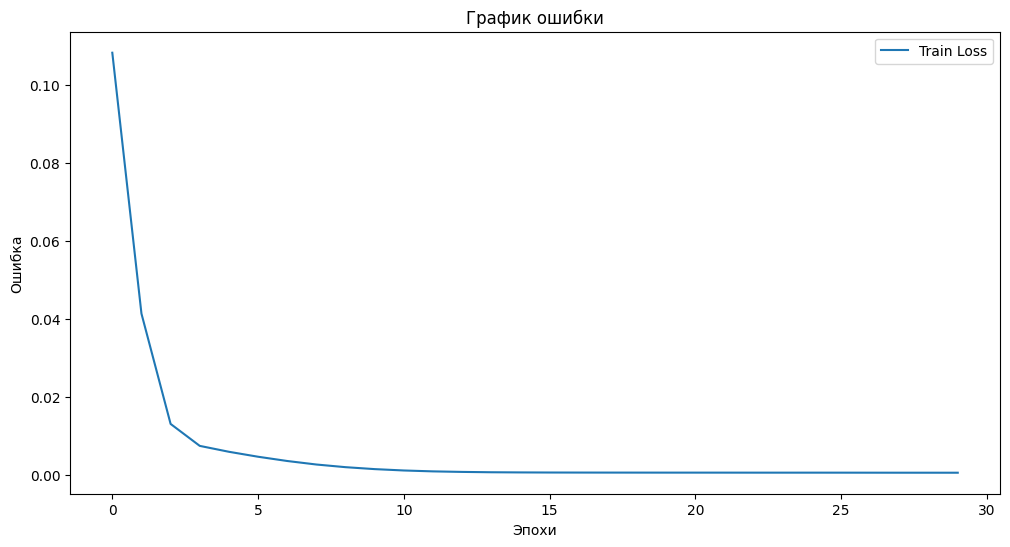

In [27]:
# График ошибки
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.title('График ошибки')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

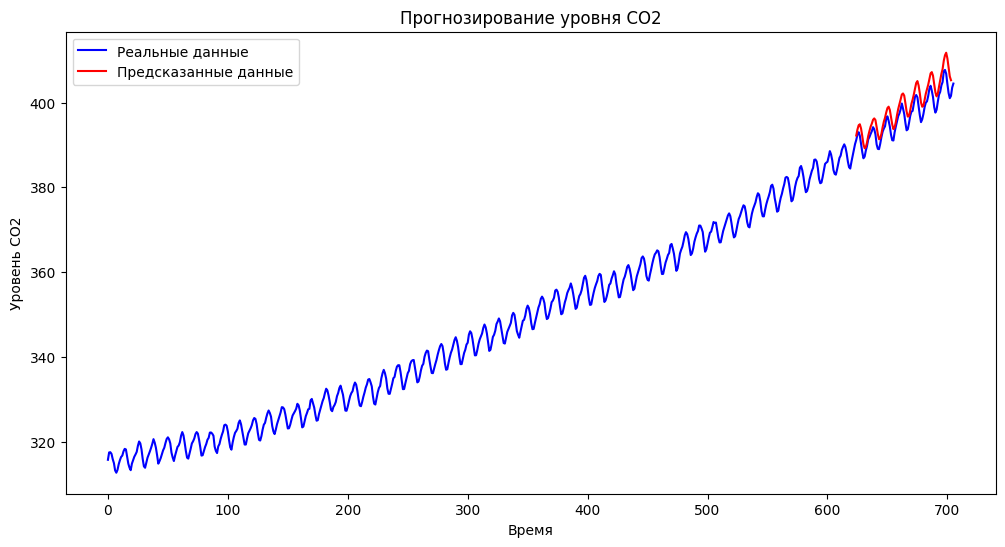

In [28]:
plt.figure(figsize=(12,6))
plt.plot(data['interpolated'].values, color='blue', label='Реальные данные')
plt.plot(range(len(trainPredict)+(2*look_back),len(trainPredict)+len(testPredict)+(2*look_back)), testPredict.flatten(), color='red', label='Предсказанные данные')
plt.title('Прогнозирование уровня CO2')
plt.xlabel('Время')
plt.ylabel('Уровень CO2')
plt.legend()
plt.show()